test/0185.pdf300/308-1122-132-35.png
1.0


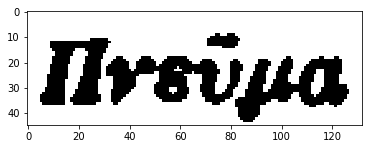

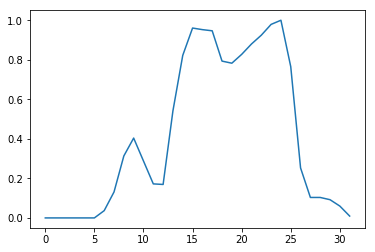

test/0185.pdf300/1217-1486-120-38.png
1.0


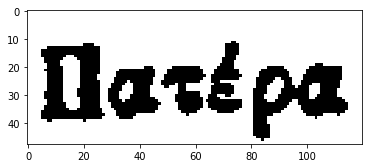

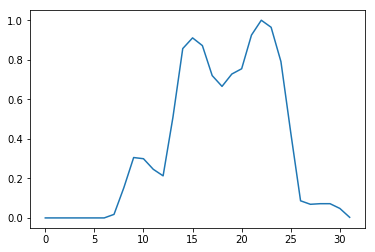

test/0185.pdf300/580-1726-132-35.png
1.0


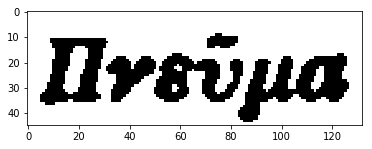

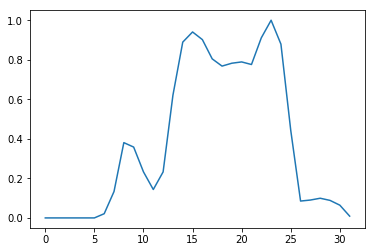

test/0185.pdf300/717-1551-124-36.png
1.0


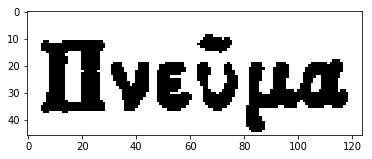

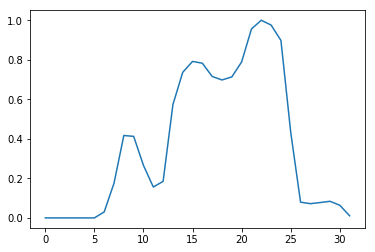

test/0185.pdf300/444-1787-133-35.png
1.0


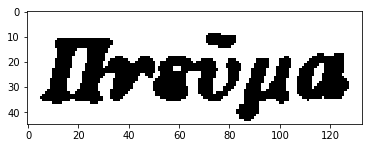

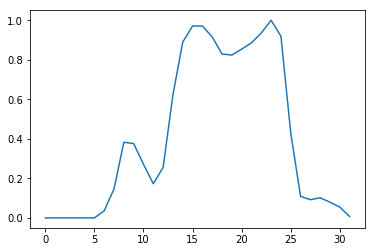

test/0165.pdf300/2679-1527-122-37.png
1.0


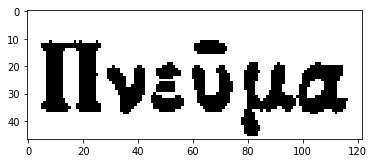

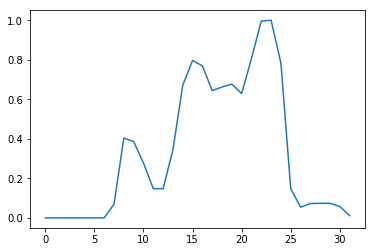

test/0165.pdf300/345-1701-119-38.png
1.0


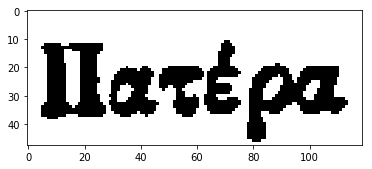

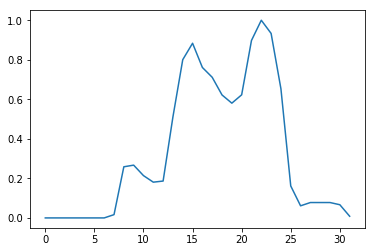

test/0165.pdf300/805-1193-131-40.png
1.0


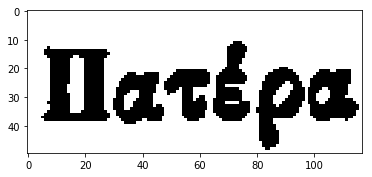

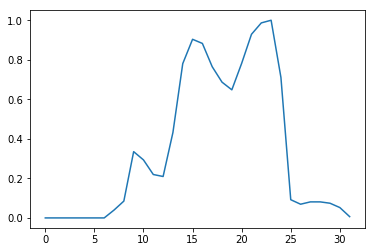

test/0165.pdf300/484-1705-123-36.png
1.0


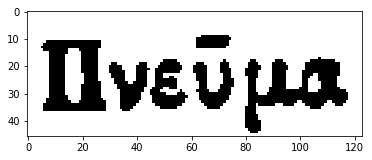

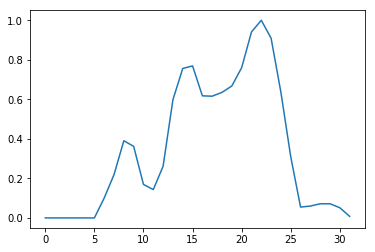

test/0165.pdf300/2681-1198-120-36.png
test/0165.pdf300/711-1549-121-37.png
test/0165.pdf300/986-1760-132-38.png
test/0165.pdf300/1806-1656-128-37.png
test/0165.pdf300/1807-1096-119-37.png
test/0165.pdf300/1387-1656-117-38.png
test/0176.pdf300/228-345-120-35.png
test/0176.pdf300/1226-338-121-38.png
test/0176.pdf300/272-577-124-36.png
test/0176.pdf300/1584-485-131-35.png
test/0186.pdf300/1072-609-133-35.png
test/0186.pdf300/335-675-134-37.png
test/0186.pdf300/932-459-131-38.png
test/0186.pdf300/1256-325-131-35.png
test/0186.pdf300/292-424-132-35.png
test/0186.pdf300/885-658-123-37.png
test/0174.pdf300/1368-397-126-37.png
test/0156.pdf300/1597-586-122-37.png
test/0183.pdf300/1455-1723-132-35.png
test/0183.pdf300/1316-1817-129-37.png
test/0183.pdf300/1824-1629-131-35.png
test/0183.pdf300/1134-1403-121-37.png
test/0183.pdf300/264-1232-132-34.png
test/0183.pdf300/447-1801-135-37.png
test/0173.pdf300/372-1156-121-38.png
test/0173.pdf300/1060-1320-120-39.png
test/0173.pdf300/1612-1702-109-31.p

In [9]:

import matplotlib.pyplot as plt 
import numpy as np
import cv2
from scipy import interpolate

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyCircleErosion(word_img,r):
    word_img=createPadding(word_img, 20) 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img
def hHist(img):
    newX=256
    newY=32
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=0)
    ymax=max(y)
    y=y/ymax
    #index=np.where(y == 0)
    #print(index)
    #print(y.shape)
    num=np.size(img,1)
    x = np.arange(num)
    #print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    return y
    
def vHist(img):
    newX=256
    newY=32
    img = cv2.bitwise_not(img)
    img = cv2.resize(img,(int(newX),int(newY)))
    img=img/255
    y=img.sum(axis=1)
    ymax=max(y)
    y=y/ymax
    
    print(max(y))
    
    
    
    #index=np.where(y == 0)
    #print(index)
    #print(y.shape)
    num=np.size(img,0)
    x = np.arange(num)
    #print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    return y

#img2 = cv2.imread("word/pisteos.png",0);
#yv=vHist(img2)
#img2 = cv2.imread("word/pneuma.png",0);





count=0
files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]

for file in files:
    print(file)
    count=count+1
    if count >9:
        continue
    
    img2 = cv2.imread(file,0);
    plt.figure()
    plt.imshow(img2,cmap="gray")
    yv=vHist(img2)



In [3]:
import numpy as np

import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

rpy2.robjects.numpy2ri.activate()

# Set up our R namespaces
R = rpy2.robjects.r
DTW = importr('dtw')

# Generate our data
idx = np.linspace(0, 2*np.pi, 100)
template = np.cos(idx)
query = np.sin(idx) + np.array(R.runif(100))/10

# Calculate the alignment vector and corresponding distance
alignment = R.dtw(query, template, keep=True)
dist = alignment.rx('distance')[0][0]

print(dist)

26.213102496862017
